# 1 Theory

### 1

# 2 Logistic Regression

In [1]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data
import pandas as pd
import math
from math import exp

In [2]:
#1
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df = iris_df[['sepal length (cm)', 'sepal width (cm)', 'target']]

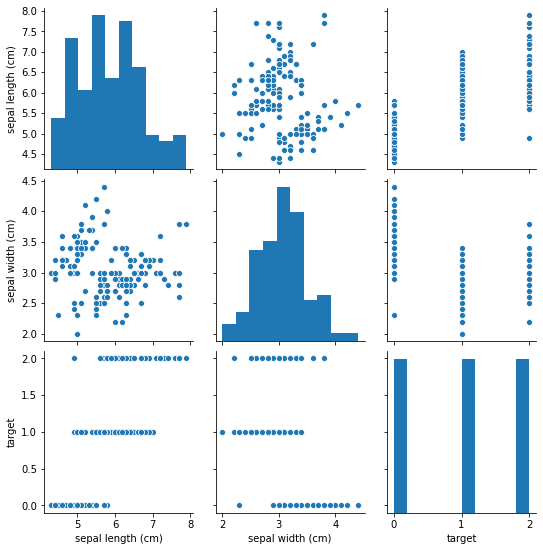

In [3]:
sb.pairplot(iris_df)

In [4]:
X = np.array(X)
y = np.array(y)
y = y.reshape((X.shape[0], 1))
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [5]:
#2
X_std = preprocessing.scale(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=42)

X_tr = np.c_[np.ones(len(X_train)),X_train]
X_tr = np.array(X_tr)
X_ts = np.c_[np.ones(len(X_test)),X_test]
X_ts = np.array(X_ts)
y_tr = np.array(y_train)
y_ts = np.array(y_test)

In [7]:
print(X_tr.shape)
print(X_ts.shape)
print(y_tr.shape)

(100, 3)
(50, 3)
(100, 1)


In [8]:
fixed_theta = []
for i in range(3):
    fixed_theta.append(random.uniform(-1,1))
fixed_theta = np.array(fixed_theta)
fixed_theta

array([-0.00896796,  0.86812428, -0.77917419])

In [41]:
fixed_theta

array([-0.00896796,  0.86812428, -0.77917419])

In [9]:
m = -1 * (X_tr @ fixed_theta)
print(m)
zeroes = np.zeros(len(m))
e = zeroes + exp(1)
1/(1 + e**m)

[-1.22459850e-01 -1.94168311e+00  1.62092299e-01  1.58485305e+00
 -2.40559864e+00 -5.86375379e-01  1.30030090e+00  1.69004182e+00
  2.12294318e+00 -1.00040887e+00 -1.11231923e+00  1.72105598e+00
  7.93224922e-01  1.22612629e+00 -3.75997838e-01  1.40548967e+00
  5.69035286e-02 -6.11964848e-01  1.57270676e+00 -6.48403703e-01
 -8.39913367e-01  2.41964162e+00 -2.58662783e-01 -5.86375379e-01
 -1.69356982e+00  3.72469840e-01  2.48413193e-01 -9.88262584e-01
  1.98674025e+00 -4.62318732e-01 -1.21750800e+00  1.33131506e+00
  1.15195168e+00 -8.08899205e-01 -9.94984176e-01  1.07777707e+00
 -4.07012000e-01  1.51067844e+00  1.69004182e+00  2.05252746e-01
 -2.08780744e-01 -8.46634959e-01 -7.96752920e-01 -1.08130507e+00
 -2.04687188e+00 -6.29535826e-01  1.24499417e+00  1.52954631e+00
 -1.69356982e+00 -1.16220127e+00  1.39334338e+00  1.58485305e+00
  1.42435754e+00 -1.47104599e+00  1.43224422e-01  1.93143352e+00
 -1.10017295e+00 -3.61389570e-02  1.46751799e+00 -5.43214932e-01
 -1.14333339e+00 -8.27767

array([0.53057676, 0.87453693, 0.45956542, 0.17010927, 0.91725323,
       0.64253306, 0.21411438, 0.15577034, 0.10688678, 0.73113896,
       0.75256123, 0.1517352 , 0.31147664, 0.22686013, 0.59290747,
       0.19694643, 0.48577796, 0.64838888, 0.17183086, 0.65665065,
       0.69844697, 0.08168714, 0.56430755, 0.64253306, 0.84469305,
       0.40794436, 0.4382141 , 0.72874461, 0.12060216, 0.6135641 ,
       0.77162471, 0.20894192, 0.24013278, 0.69187488, 0.73007127,
       0.25392692, 0.6003712 , 0.18083827, 0.15577034, 0.4488662 ,
       0.55200641, 0.69986077, 0.68927947, 0.74674088, 0.88563116,
       0.6523842 , 0.22356788, 0.17806008, 0.84469305, 0.76173247,
       0.19887454, 0.17010927, 0.19397937, 0.81321632, 0.46425498,
       0.126592  , 0.75029251, 0.50903376, 0.18732016, 0.63255998,
       0.75829113, 0.69588258, 0.7214818 , 0.57949267, 0.10688678,
       0.73613935, 0.53829337, 0.6866721 , 0.65938392, 0.48881256,
       0.58997247, 0.48409908, 0.74443691, 0.61068023, 0.15017

In [24]:
X_tr[:,[1]]

array([[ 1.        , -0.17367395, -0.36217625],
       [ 1.        ,  2.12851559, -0.13197948],
       [ 1.        , -0.29484182, -0.13197948],
       [ 1.        , -0.90068117,  1.01900435],
       [ 1.        ,  2.24968346, -0.59237301],
       [ 1.        , -0.05250608, -0.82256978],
       [ 1.        , -0.7795133 ,  0.78880759],
       [ 1.        , -1.02184904,  1.01900435],
       [ 1.        , -0.90068117,  1.70959465],
       [ 1.        , -1.02184904, -2.43394714],
       [ 1.        ,  0.55333328, -0.82256978],
       [ 1.        , -1.26418478,  0.78880759],
       [ 1.        , -1.02184904, -0.13197948],
       [ 1.        , -0.90068117,  0.55861082],
       [ 1.        , -0.29484182, -0.82256978],
       [ 1.        , -0.90068117,  0.78880759],
       [ 1.        , -0.17367395, -0.13197948],
       [ 1.        ,  2.24968346,  1.70959465],
       [ 1.        , -1.50652052,  0.32841405],
       [ 1.        ,  0.4321654 , -0.36217625],
       [ 1.        , -0.17367395, -1.282

In [59]:
#3

def compute_new_theta(theta, eta, X, Y):
    return theta - (eta * (2 * (X.T @ ((X @ theta) - Y))))

# def y_compute(X1, X2, thetas):
#     return abs(thetas[0] + (thetas[1] * X1) + (thetas[2] * X2))

def y_compute(X, theta):
    a = -1 * (X @ theta)
    return (1/(1 + e**a))[0]

def g(X,theta): # returns (100,)
    m = -1 * (X @ theta)
    zeroes = np.zeros(len(m))
    e = zeroes + exp(1)
    return 1/(1 + e**m)

def limit(theta, eta, X, y):
    return theta + (eta * (X.T @ (y - (g(X, theta)).reshape(100,1)))).reshape(3,)

theta = fixed_theta.copy()
theta = np.array(theta)
# theta = theta.reshape(1,3)

maxE = 2**(-23)
print('maxE',maxE)
new_theta = theta.copy()
theta = np.array(new_theta)

print(g(X_tr, theta))

print('Initial theta: ',theta)

iteration = 0
log_errors = []

while True:
    new_theta = np.array(limit(theta, 0.01, X_tr, y_tr))
#     print('new theta', new_theta)
#     print(new_theta.shape)
    if abs(theta[0] - new_theta[0]) < maxE and abs(theta[1] - new_theta[1]) < maxE and abs(theta[2] - new_theta[2]) < maxE:
        break
    if iteration == 10000:
        break
    
    error_sum = 0
    
    for x,y in zip(X_tr, y_tr):
#         X1 = x[1]
#         X2 = x[2]
        y_a = y
        y_p = y_compute(x, new_theta)
        if y_p <= 0:
            print(y_p)
        error = (y_a * np.log(y_p)) + ((1-y_a) * np.log(1-y_p))
        error_sum += error
    
    log_error = error_sum / X_tr.shape[0]
    log_errors.append(log_error)
    
    
    theta = new_theta
    iteration = iteration + 1

print('new theta',new_theta)
# print('errors', log_errors)
print(iteration)


# plt.axes(xlabel='iterations', ylabel='RMSEs for Test set')
# plt.plot(iterations, RMSEs_test)
# plt.show()

# plt.axes(xlabel='iterations', ylabel='RMSEs for Training set')
# plt.plot(iterations, RMSEs_train)
# plt.show()

maxE 1.1920928955078125e-07
[0.53057676 0.87453693 0.45956542 0.17010927 0.91725323 0.64253306
 0.21411438 0.15577034 0.10688678 0.73113896 0.75256123 0.1517352
 0.31147664 0.22686013 0.59290747 0.19694643 0.48577796 0.64838888
 0.17183086 0.65665065 0.69844697 0.08168714 0.56430755 0.64253306
 0.84469305 0.40794436 0.4382141  0.72874461 0.12060216 0.6135641
 0.77162471 0.20894192 0.24013278 0.69187488 0.73007127 0.25392692
 0.6003712  0.18083827 0.15577034 0.4488662  0.55200641 0.69986077
 0.68927947 0.74674088 0.88563116 0.6523842  0.22356788 0.17806008
 0.84469305 0.76173247 0.19887454 0.17010927 0.19397937 0.81321632
 0.46425498 0.126592   0.75029251 0.50903376 0.18732016 0.63255998
 0.75829113 0.69588258 0.7214818  0.57949267 0.10688678 0.73613935
 0.53829337 0.6866721  0.65938392 0.48881256 0.58997247 0.48409908
 0.74443691 0.61068023 0.15017843 0.45956542 0.85881473 0.6122771
 0.1252551  0.54432498 0.6122771  0.8206751  0.1218963  0.69330597
 0.28937659 0.73613935 0.88993059 0.6

s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in multiply


new theta [10.12281216 14.9683808  -7.05068352]
errors [array([-0.30867147]), array([-0.27140145]), array([-0.24417573]), array([-0.2233327]), array([-0.2067878]), array([-0.19327708]), array([-0.18199235]), array([-0.17239328]), array([-0.16410471]), array([-0.15685774]), array([-0.15045423]), array([-0.14474476]), array([-0.13961429]), array([-0.13497265]), array([-0.13074808]), array([-0.12688267]), array([-0.12332908]), array([-0.12004824]), array([-0.11700754]), array([-0.11417954]), array([-0.11154099]), array([-0.10907197]), array([-0.1067554]), array([-0.10457647]), array([-0.10252228]), array([-0.10058158]), array([-0.09874444]), array([-0.09700213]), array([-0.09534687]), array([-0.09377176]), array([-0.09227064]), array([-0.09083797]), array([-0.08946877]), array([-0.08815857]), array([-0.08690329]), array([-0.08569926]), array([-0.08454313]), array([-0.08343184]), array([-0.0823626]), array([-0.08133287]), array([-0.08034029]), array([-0.07938271]), array([-0.07845815]), ar